In [ ]:
# 1. Implement the linear regression for the univariate problem using gradient descent for the attached data file ice_cream_sales_vs_temperature.csv.
# Plot the cost function and the best-fit line. (you can only use numpy and pandas library).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ice_cream_sales_vs_temperature.csv to ice_cream_sales_vs_temperature.csv


In [ ]:
df = pd.read_csv("ice_cream_sales_vs_temperature.csv")

In [ ]:
df.head()

,Temperature_C,Ice_Cream_Sales
0,27.490802,1911.463448
1,39.014286,2459.282720
2,34.639879,2226.211528
3,31.973170,2083.603299
4,23.120373,1582.092541


In [ ]:
x = df['Temperature_C'].values
y = df['Ice_Cream_Sales'].values
print(x)
print(y)

[27.49080238 39.01428613 34.63987884 31.97316968 23.12037281 23.11989041
 21.16167224 37.32352292 32.02230023 34.16145156 20.41168989 39.39819704
 36.64885282 24.24678221 23.63649934 23.6680902  26.08484486 30.49512863
 28.63890037 25.8245828  32.23705789 22.78987721 25.84289297 27.32723687
 29.12139968 35.70351923 23.99347564 30.28468877 31.84829138 20.92900825
 32.15089704 23.41048247 21.30103186 38.97771075 39.31264066 36.16794696
 26.09227538 21.95344228 33.68466053 28.80304987 22.4407647  29.9035382
 20.68777042 38.18640804 25.17559963 33.25044569 26.23422152 30.40136042
 30.93420559 23.69708911]
[1911.46344785 2459.28272047 2226.21152769 2083.60329942 1582.09254092
 1620.00230992 1535.05167362 2419.03225709 2118.29592622 2119.92057003
 1536.78869277 2450.65573814 2298.59654079 1742.92292512 1733.37494333
 1729.96851581 1762.2813668  2009.29581284 1948.50819021 1840.00639655
 2087.89418283 1630.21091182 1736.82789983 1806.55151209 1996.69627534
 2352.98796282 1696.07327608 2064.41

In [ ]:
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_scaled = (x - x_min) / (x_max - x_min)
y_scaled = (y - y_min) / (y_max - y_min)

In [ ]:
def J(w0, w1, x, y):
  m = len(x)
  return (1 / (2 * m)) * np.sum((w0 + w1*x - y) ** 2)

In [79]:
w0 = 0
w1 = 0
alpha = 0.01
iterations = 10000

In [80]:
m = len(x_scaled)
J_history = []
for _ in range(iterations):
  dw0 = (1/ m) * np.sum(w0 + w1*x_scaled - y_scaled)
  dw1 = (1 / m) * np.sum((w0 + w1*x_scaled - y_scaled) * x_scaled)
  w0 -= alpha * dw0
  w1 -= alpha * dw1
  J_history.append(J(w0, w1, x_scaled, y_scaled))
print(w0, w1)

0.01106234328701893 0.9263134856472027


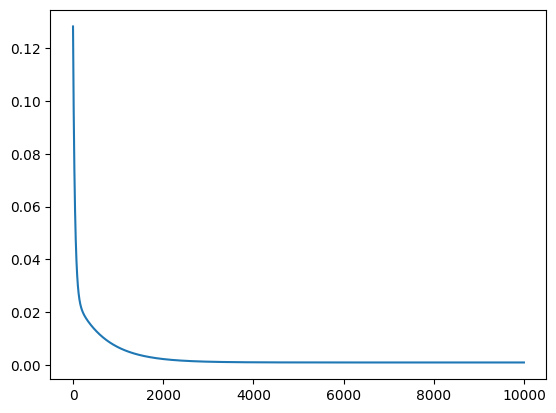

In [81]:
plt.plot(range(iterations), J_history, label="Cost Function")

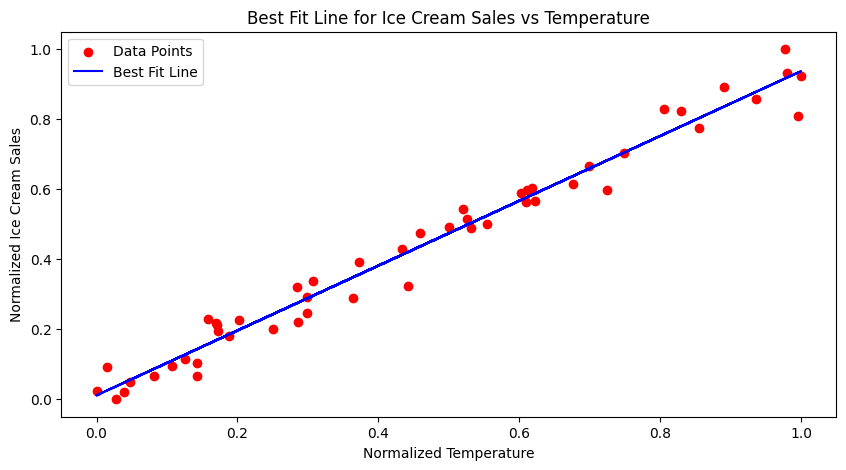

In [82]:
plt.figure(figsize=(10, 5))

# Scatter plot for actual (scaled) data
plt.scatter(x_scaled, y_scaled, color='red', label="Data Points")

# Best fit line using scaled x values
plt.plot(x_scaled, w0 + w1*x_scaled, color='blue', label="Best Fit Line")

plt.xlabel("Normalized Temperature")  # Change label since x is now scaled
plt.ylabel("Normalized Ice Cream Sales")
plt.title("Best Fit Line for Ice Cream Sales vs Temperature")
plt.legend()
plt.show()

In [ ]:
# 2. Using the given dataset, 3D_printing_data.csv,  find how the 3D printing parameters (layer height, wall thickness, infill density, nozzle temperature, bed temperature,
# print speed, material, and fan speed) affect the tensile strength of the printed object. (Do the necessary data cleaning and preprocessing before performing the linear regression)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3D_printing_data.csv to 3D_printing_data.csv


In [ ]:
df2 = pd.read_csv("3D_printing_data.csv")
print(df2.head())
df2["material"] = df2["material"].map({"abs": 0, "pla": 1})
print(df2.head())

   layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40     

In [ ]:
X = df2[['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'material', 'fan_speed']].values


In [ ]:
Y = df2['tension_strenght'].values
print(Y)
m = Y.shape[0]
print(m)

[18 16  8 10  5 24 12 14 27 25 37 12 16  9 10 27 23 26 33 29 16 12 10 19
  8 11 12 18 34 14 27 19 18  9 13 33 24 26 22  4 35 34 28 28 21 28 14 30
 29 27]
50


In [ ]:
alpha = 0.001
iterations = 10000

In [ ]:
n = len(X[0])
w = np.zeros(n + 1)
print(w)


[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
m = X.shape[0]
X = X / np.max(X, axis=0)
X_matrix = np.vstack([np.ones(m), X.T])

In [ ]:
cost_history = []

In [ ]:
def compute_cost():
    total_cost = 0
    for i in range(m):
        prediction = sum(w[j] * X_matrix[j, i] for j in range(9))
        error = prediction - Y[i]
        total_cost += error ** 2
    return total_cost / (2 * m)

In [ ]:
for _ in range(iterations):
    gradients = np.zeros(9)

    for i in range(m):
        prediction = sum(w[j] * X_matrix[j, i] for j in range(9))
        error = prediction - Y[i]

        for j in range(9):
            gradients[j] += error * X_matrix[j, i]


    for j in range(9):
        w[j] -= alpha * gradients[j] / m


    cost_history.append(compute_cost())

print("Final Weights:", w)

Final Weights: [ 4.05838467  7.32802024  7.55846561  7.93498787  2.45377053  1.90215616
 -1.43366452  5.51717534 -4.56652937]


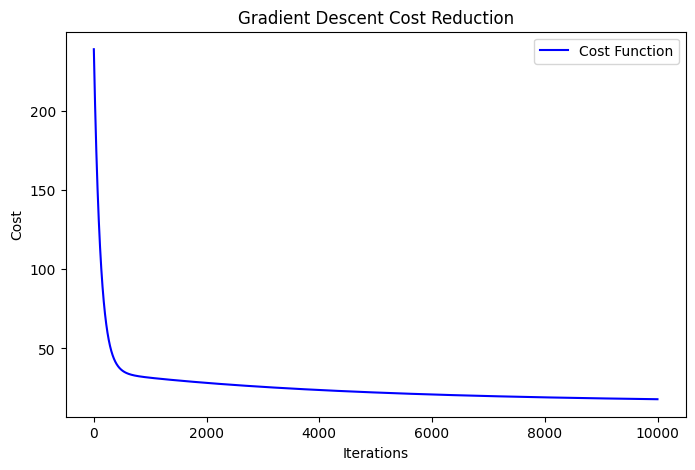

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, label="Cost Function", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost Reduction")
plt.legend()
plt.show()

In [ ]:
# 3. Fit polynomial equations of degree 1  to 4  for the given data noisy_point_data.csv.  Determine the values of coefficients that minimize the residual error(RMSE).
# Plot the original data with your best-fit line. Explain why your chosen polynomial degree is appropriate for this data Also, find the nature of the curve.

In [ ]:

uploaded = files.upload()


Saving noisy_point_data.csv to noisy_point_data (1).csv


In [ ]:
df3 = pd.read_csv("noisy_point_data.csv")
df3.head()

,x,y
0,-10.000000,232.490142
1,-9.959920,228.864973
2,-9.919840,229.509023
3,-9.879760,230.427664
4,-9.839679,223.455158


Text(0.5, 1.0, 'Original Data Plot')

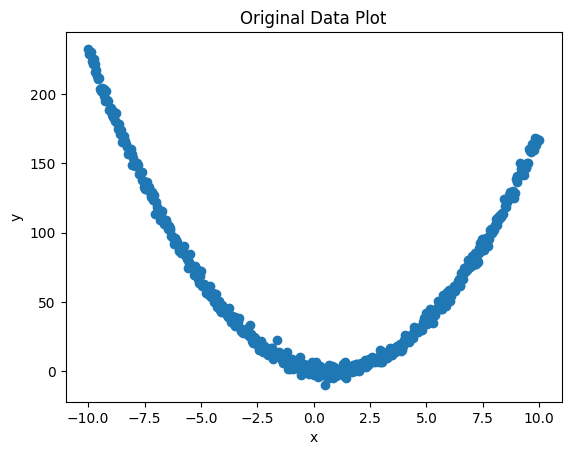

In [ ]:
x = df3['x'].values
y = df3['y'].values
plt.scatter(x, y, label='Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data Plot')

In [95]:
def polynomial_features(x, degree):
    return np.array([[xi ** d for d in range(degree + 1)] for xi in x])

def compute_weights(X, y):
    X_transpose = X.T
    return np.linalg.inv(X_transpose @ X) @ X_transpose @ y

def predict(X, w):
    return X @ w

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [108]:
degrees = [1, 2, 3, 4]
best_degree = None
lowest_rmse = float("inf")

for degree in degrees:
    X_poly = polynomial_features(x, degree)
    w = compute_weights(X_poly, y)
    y_pred = predict(X_poly, w)

    error = rmse(y, y_pred)
    print(f"Degree {degree}: RMSE = {error:.4f}, Coefficients: {w}")




Degree 1: RMSE = 59.7295, Coefficients: [67.95438172 -2.98891539]
Degree 2: RMSE = 2.9326, Coefficients: [ 1.25490985 -2.98891539  1.9929962 ]
Degree 3: RMSE = 2.9326, Coefficients: [ 1.25490985e+00 -2.98622296e+00  1.99299620e+00 -4.46950524e-05]
Degree 4: RMSE = 2.9326, Coefficients: [ 1.25320132e+00 -2.98622296e+00  1.99316637e+00 -4.46950524e-05
 -1.97747327e-06]


In [110]:
best_degree = 2

# We are choosing 2 over 4 because for higher degrees, oscillations start and also it leads to overfitting
best_weights = compute_weights(polynomial_features(x, 2), y)
lowest_rmse = rmse(y, predict(polynomial_features(x, 2), best_weights))
print(f"Best Polynomial Degree: {best_degree}, Lowest RMSE: {lowest_rmse:.4f}")
print(f"Best Coefficients: {best_weights}")



Best Polynomial Degree: 2, Lowest RMSE: 2.9326
Best Coefficients: [ 1.25490985 -2.98891539  1.9929962 ]


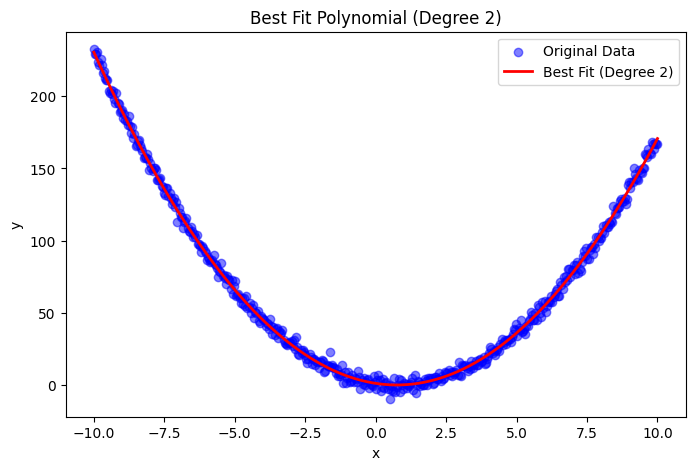

In [111]:
X_best_poly = polynomial_features(x, best_degree)
y_best_pred = predict(X_best_poly, best_weights)


x_range = np.linspace(min(x), max(x), 100)
X_range_poly = polynomial_features(x_range, best_degree)
y_range_pred = predict(X_range_poly, best_weights)


plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Original Data", alpha=0.5)
plt.plot(x_range, y_range_pred, color="red", label=f"Best Fit (Degree {best_degree})", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Best Fit Polynomial (Degree {best_degree})")
plt.legend()
plt.show()


In [112]:
# 4. Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (5*x1)^2+(x2)^2. While applying gradient descent, do the following
# (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.
def J(x1, x2):
  return (5*x1)**2 + x2**2

def gradient_J(x1, x2):
  return np.array([50*x1, 2*x2])

def steepest_gradient_descent(initial_x1, initial_x2, alpha, iterations):
    x1 = initial_x1
    x2 = initial_x2
    x1_history = [x1]
    x2_history = [x2]
    for _ in range(iterations):
        grad = gradient_J(x1, x2)
        x1 = x1 - alpha * grad[0]
        x2 = x2 - alpha * grad[1]
        x1_history.append(x1)
        x2_history.append(x2)
    return x1, x2, x1_history, x2_history

def steepest_gradient_descent_line_search(initial_x1, initial_x2, iterations, tolerance = 1e-6):
    x1 = initial_x1
    x2 = initial_x2
    x1_history = [x1]
    x2_history = [x2]
    for _ in range(iterations):
        grad = gradient_J(x1, x2)
        alpha = 1.0
        while True:
          new_x1 = x1 - alpha * grad[0]
          new_x2 = x2 - alpha * grad[1]

          if J(new_x1, new_x2) < J(x1,x2):
            x1 = new_x1
            x2 = new_x2
            break
          alpha *= 0.5
          if alpha < tolerance:
            break

        x1_history.append(x1)
        x2_history.append(x2)

    return x1, x2, x1_history, x2_history




In [119]:
alpha = 0.001
iterations = 10000
x1_min, x2_min, x1_history_fixed, x2_history_fixed = steepest_gradient_descent(10, 10, alpha, iterations)

In [120]:
x1_min_ls, x2_min_ls, x1_history_ls, x2_history_ls = steepest_gradient_descent_line_search(10, 10, iterations)


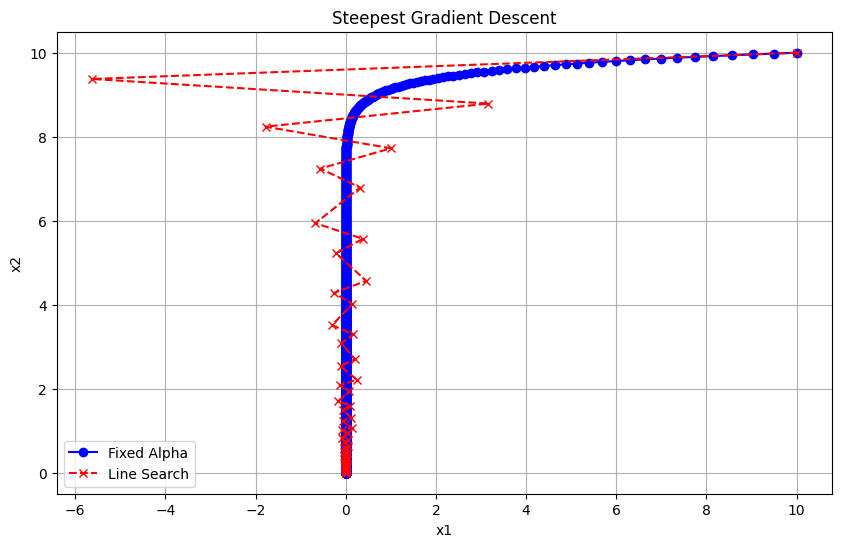

Local minimum (Fixed alpha): x1 = 0.0000, x2 = 0.0000, J(x1, x2) = 0.0000
Local minimum (Line Search): x1 = 0.0000, x2 = 0.0000, J(x1, x2) = 0.0000


In [121]:
plt.figure(figsize=(10, 6))
plt.plot(x1_history_fixed, x2_history_fixed, marker='o', linestyle='-', color='b', label="Fixed Alpha")
plt.plot(x1_history_ls, x2_history_ls, marker='x', linestyle='--', color='r', label="Line Search")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Steepest Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

print(f"Local minimum (Fixed alpha): x1 = {x1_min:.4f}, x2 = {x2_min:.4f}, J(x1, x2) = {J(x1_min,x2_min):.4f}")
print(f"Local minimum (Line Search): x1 = {x1_min_ls:.4f}, x2 = {x2_min_ls:.4f}, J(x1, x2) = {J(x1_min_ls,x2_min_ls):.4f}")